
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E02_merging.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Merging exercises

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations**, **data cleaning**, **merging**, **concatenation**, **joining**, **parse html tables** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Swedish demographic data (*)

Go to Swedish-language wikipedia page [Sveriges demografi](https://sv.wikipedia.org/wiki/Sveriges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

&nbsp; c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865. 

| År   | Folkmängd |
| ---- | --------- | 
| 1570 | 900000    |     
| 1650 | 1225000   |
| 1700 | 1485000   |
| 1720 | 1350000   |
| 1755 | 1878000   |
| 1815 | 2465000   |
| 1865 | 4099000   |


&nbsp; d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways. 

&nbsp; e) Draw a graph of population data from 1570-2020.

&nbsp; f) Try to see if you can plot something from this data that might show the effects of the Covid-19 pandemic. It's good to zoom in the data, i.e. plot a shorter time frame instead of all time frames. 

&nbsp; g) Try to see if you can plot something from this data that might capture the effects imigration and emigration waves.

&nbsp; h) Feel free to find other interesting facts about the Swedish demographics based on this data. 

<details>
<summary>Hint</summary>

Useful methods:
- append()
- join()
- concat()
- merge()

</details>

<br/>

<details>

<summary>Answer</summary>

![Sweden population data 1952-2020](../assets/sverige_befolkning_tid.png)

</details>

## a) 

*Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame*

Jag har nu installerat biblioteken requests och beautifulsoup, för att kunna smidigt importera statistiken från wikipedia som en url. Jag börjar sedan med att ge rätt namn till År-kolumnen, då den var den enda som hade fel namn.  
I min undersökning av datasetet insåg jag att fyra av kolumnerna innehöll siffror som objekt istället för int, vilket gjorde att det inte gick att plotta samband. Därför skapade jag i min data_utils en ny funktion som konverterar kolumner till int.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from bs4 import BeautifulSoup
from data_utils import plot_missing_values
from data_utils import convert_columns_to_int


url = "https://sv.wikipedia.org/wiki/Sveriges_demografi#Befolkningsstatistik_sedan_1900"
headers = {
    'User-Agent': 'Mozilla/5.0'
}

response = requests.get(url, headers= headers)
soup = BeautifulSoup(response.text, 'html.parser')
tables_html = soup.find_all('table', {'class':'wikitable'})
befolkning_stats = pd.read_html(str(tables_html[4]))[0]

befolkning_stats = befolkning_stats.rename(columns={'Unnamed: 0': 'År'})

C:\Users\Sebastian!\AppData\Local\Temp\ipykernel_29320\3610812184.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  befolkning_stats = pd.read_html(str(tables_html[4]))[0]


In [3]:
cols_to_convert = ['Medel- folkmängd', 'Födda', 'Döda', 'Naturlig befolknings- förändring']
display(befolkning_stats.dtypes)
convert_columns_to_int(befolkning_stats, cols_to_convert).head(5)

År                                               int64
Medel- folkmängd                                object
Födda                                           object
Döda                                            object
Naturlig befolknings- förändring                object
Nativitet (per 1000)                           float64
Dödstal (per 1000)                             float64
Naturlig befolknings- förändring (per 1000)    float64
Total fertilitet                               float64
dtype: object

,År,Medel- folkmängd,Födda,Döda,Naturlig befolknings- förändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolknings- förändring (per 1000),Total fertilitet
0,1900,5117000,138139,86146,51993,270.0,168.0,102.0,402.0
1,1901,5156000,139370,82772,56598,270.0,161.0,110.0,404.0
2,1902,5187000,137364,79722,57642,265.0,154.0,111.0,395.0
3,1903,5210000,133896,78610,55286,257.0,151.0,106.0,382.0
4,1904,5241000,134952,80152,54800,257.0,153.0,105.0,383.0


# b)
*Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.*

<Axes: title={'center': 'Dödstal (per 1000) från 1900-2022'}, xlabel='År', ylabel='Dödstal (per 1000)'>

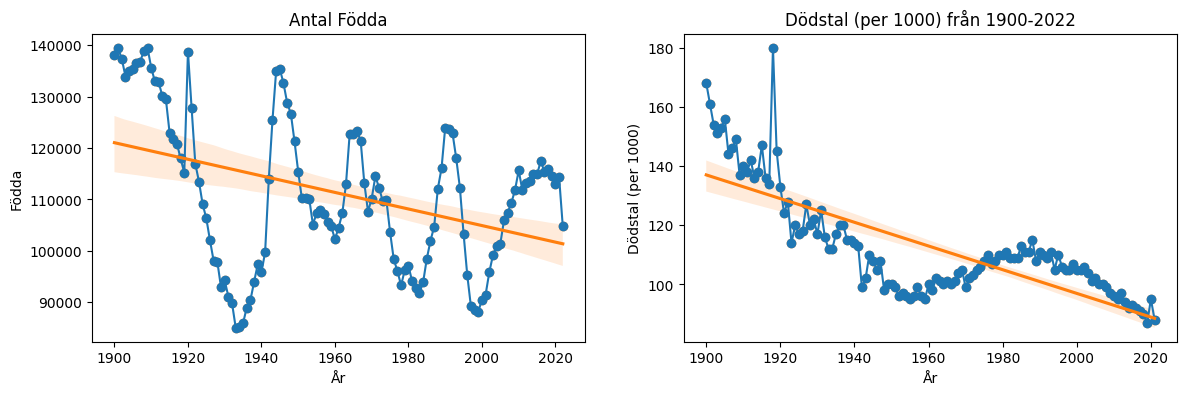

In [4]:

fig, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].plot(befolkning_stats['År'], befolkning_stats['Födda'], marker = 'o')
ax[0].set(title='Antal Födda', xlabel = 'År', ylabel = 'Antal födda')

ax[1].plot(befolkning_stats['År'], befolkning_stats['Dödstal (per 1000)'], marker = 'o')
ax[1].set(title = 'Dödstal (per 1000) från 1900-2022', xlabel = 'År', ylabel = 'Antal döda')

sns.regplot(data=befolkning_stats, x = 'År', y = 'Födda', ax =ax[0])
sns.regplot(data=befolkning_stats, x = 'År', y = 'Dödstal (per 1000)', ax = ax[1])

# c)

 *Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865.* 

| År   | Folkmängd |
| ---- | --------- | 
| 1570 | 900000    |     
| 1650 | 1225000   |
| 1700 | 1485000   |
| 1720 | 1350000   |
| 1755 | 1878000   |
| 1815 | 2465000   |
| 1865 | 4099000   |

In [5]:
history = pd.read_html(str(tables_html[0]))[0]
history.columns = history.columns.get_level_values(0)
history = history[['Vid utgången av år', 'Folkmängd']].rename(columns={'Vid utgången av år': 'År', 'Folkmängd': 'Medel- folkmängd'}).iloc[:7]
cols_to_convert2 = ['År', 'Medel- folkmängd']
history = convert_columns_to_int(history, cols_to_convert2)

C:\Users\Sebastian!\AppData\Local\Temp\ipykernel_29320\3423728499.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  history = pd.read_html(str(tables_html[0]))[0]


# d)

 *Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways.*

In [6]:
befolkning_stats = pd.concat((history, befolkning_stats))
befolkning_stats

,År,Medel- folkmängd,Födda,Döda,Naturlig befolknings- förändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolknings- förändring (per 1000),Total fertilitet
0,1570,900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1650,1225000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1700,1485000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720,1350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1755,1878000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
118,2018,10175213,115832.0,92185.0,23647.0,113.0,90.0,23.0,175.0
119,2019,10278887,114523.0,88766.0,28727.0,111.0,87.0,24.0,170.0
120,2020,10353442,113077.0,98124.0,14953.0,109.0,95.0,14.0,166.0
121,2021,10415810,114263.0,91958.0,22305.0,110.0,88.0,22.0,NaN


## e)

*Draw a graph of population data from 1570-2020.*

Text(0, 0.5, 'Population')

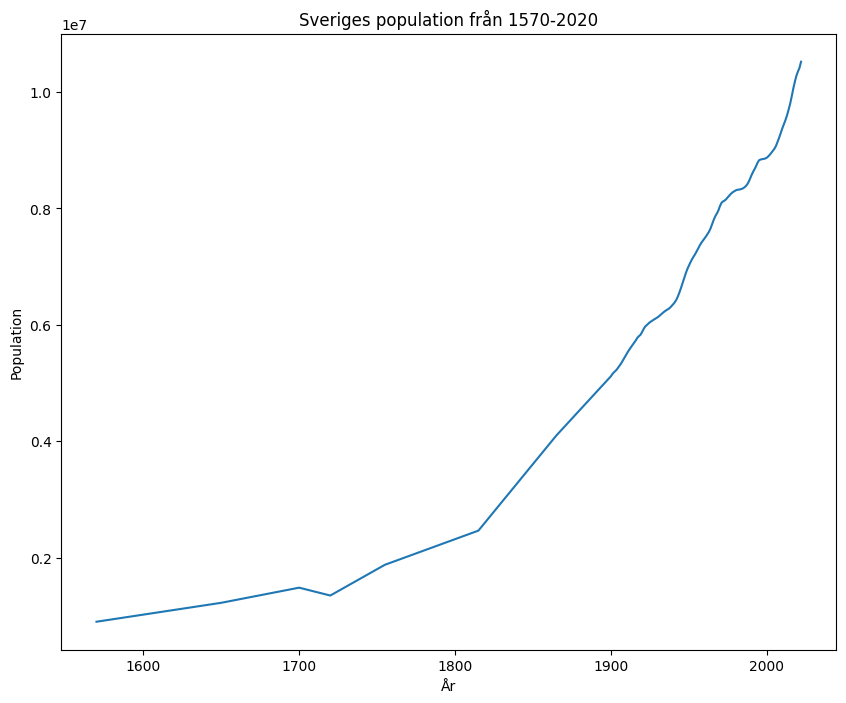

In [7]:
plt.figure(figsize=(10,8))

plt.plot(befolkning_stats['År'], befolkning_stats['Medel- folkmängd'])
plt.title('Sveriges population från 1570-2020')
plt.xlabel('År')
plt.ylabel('Population')

## f) 
*Try to see if you can plot something from this data that might show the effects of the Covid-19 pandemic. It's good to zoom in the data, i.e. plot a shorter time frame instead of all time frames.* 


In [10]:
covid_mark = befolkning_stats.tail(5)
covid_mark

,År,Medel- folkmängd,Födda,Döda,Naturlig befolknings- förändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolknings- förändring (per 1000),Total fertilitet
118,2018,10175213,115832.0,92185.0,23647.0,113.0,90.0,23.0,175.0
119,2019,10278887,114523.0,88766.0,28727.0,111.0,87.0,24.0,170.0
120,2020,10353442,113077.0,98124.0,14953.0,109.0,95.0,14.0,166.0
121,2021,10415810,114263.0,91958.0,22305.0,110.0,88.0,22.0,NaN
122,2022,10521556,104734.0,94737.0,9997.0,NaN,NaN,NaN,NaN


---
## 2. Denmark demographic data (*)

Go to the Danish-language wikipedia page [Danmarks demografi](https://da.wikipedia.org/wiki/Danmarks_demografi). 

&nbsp; a) Read in the table under "Demografiske data" into a DataFrame (*)

&nbsp; b) Clean the data and draw a graph of population against year from 1769-2020. (**)


---
## 3. Norwegian demographic data (*)

Go to Swedish-language wikipedia page [Norges demografi](https://sv.wikipedia.org/wiki/Norges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) You see some missing data in column "Total fertilitet". Go to the [English page](https://en.wikipedia.org/wiki/Demographics_of_Norway) and read in the data from "Vital statistics since 1900".  

&nbsp; c) Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet". 


---
## 4. Merge Sweden-Norway (*)

Create a population graph and a fertility graph showing Sweden and Norway.

<details>

<summary>Answer</summary>

![Fertilitet Norge och Sverige](../assets/fertilitet_sv_no.png)

![Folkmängd Norge och Sverige](../assets/folkmangd_sverige_norge.png)

</details>

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---